In [493]:
import torch
import os
import pandas as pd
import numpy as np
import time
import random
from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from torch.utils.data import DataLoader
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [494]:
# No need to change anything here!
# If there is a GPU available, it will use it,
# otherwise, it will use the CPU

RANDOM_SEED = 123
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [495]:
NAME = "models/classifier_143features_100x100x100_0.001lr_200e_0.2dropout"

## Dataset Loader

In [599]:
import torch
from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from torch.utils.data import DataLoader
import pandas as pd

import os


keys = [
 'Revenue Growth',
 'EPS',
 'EPS Diluted',
 'Dividend per Share',
 'Gross Margin',
 'EBITDA Margin',
 'EBIT Margin',
 'Profit Margin',
 'Free Cash Flow margin',
 'Earnings Before Tax Margin',
 'Net Profit Margin',
 'Revenue per Share',
 'Net Income per Share',
 'Operating Cash Flow per Share',
 'Free Cash Flow per Share',
 'Cash per Share',
 'Book Value per Share',
 'Tangible Book Value per Share',
 'Shareholders Equity per Share',
 'Interest Debt per Share',
 'PE ratio',
 'Price to Sales Ratio',
 'POCF ratio',
 'PFCF ratio',
 'PB ratio',
 'PTB ratio',
 'EV to Sales',
 'Enterprise Value over EBITDA',
 'EV to Operating cash flow',
 'EV to Free cash flow',
 'Earnings Yield',
 'Free Cash Flow Yield',
 'Debt to Equity',
 'Debt to Assets',
 'Net Debt to EBITDA',
 'Current ratio',
 'Interest Coverage',
 'Income Quality',
 'Dividend Yield',
 'Payout Ratio',
 'SG&A to Revenue',
 'R&D to Revenue',
 'Intangibles to Total Assets',
 'Capex to Operating Cash Flow',
 'Capex to Revenue',
 'Capex to Depreciation',
 'Stock-based compensation to Revenue',
 'Graham Number',
 'Graham Net-Net',
 'Capex per Share',
 'Gross Profit Growth',
 'EBIT Growth',
 'Operating Income Growth',
 'Net Income Growth',
 'EPS Growth',
 'EPS Diluted Growth',
 'Weighted Average Shares Growth',
 'Weighted Average Shares Diluted Growth',
 'Dividends per Share Growth',
 'Operating Cash Flow growth',
 'Free Cash Flow growth',
 'Receivables growth',
 'Inventory Growth',
 'Asset Growth',
 'Book Value per Share Growth',
 'Debt Growth',
 'R&D Expense Growth',
 'SG&A Expenses Growth',
 'Stock Price',
 'DCF',
]

class StockDataset(Dataset):
    def __init__(self, csv_path):
        df = pd.read_csv(csv_path)
        self.y = df['Label'].to_numpy().astype(int)
        self.features = df.drop(["Company", "Date", "Target", "Label"], axis=1).to_numpy().astype('float32')
#         self.features = df[keys].to_numpy().astype('float32')
#         self.features = df[["Stock Price", "DCF"]].to_numpy().astype('float32')


    def __getitem__(self, index):
        features = self.features[index]
        label = self.y[index]
        
        out_label = 0
        
        if label <= 2:
            out_label = 0
        elif label <= 5:
            out_label = 1
        else:
            out_label = 2
        
        return features, label

    def __len__(self):
        return self.y.shape[0]

In [600]:
############################################################
# THIS CELL CAN BE MODIFIED
############################################################

custom_train_transform = transforms.Compose([  
                                             transforms.ToTensor(),
                                             transforms.Normalize(mean=(0.5,), std=(0.5,))
])

In [601]:
####################################################################
# THIS CELL CAN BE MODIFIED BUT THERE SHOULD NOT BE ANY RANDOMNESS
####################################################################

custom_test_transform = transforms.Compose([
                                             transforms.ToTensor(),
                                             transforms.Normalize(mean=(0.5,), std=(0.5,))
])

In [602]:
############################################################
# THIS CELL CAN BE MODIFIED
############################################################

BATCH_SIZE = 64

In [603]:
train_dataset = StockDataset(csv_path='train_raw.csv')


train_loader = DataLoader(dataset=train_dataset,
                          batch_size=BATCH_SIZE,
                          shuffle=False,
                          num_workers=0)


valid_dataset = StockDataset(csv_path='val_raw.csv')

valid_loader = DataLoader(dataset=valid_dataset,
                          batch_size=BATCH_SIZE,
                          shuffle=False,
                          num_workers=0)

test_dataset = StockDataset(csv_path='test_raw.csv')

test_loader = DataLoader(dataset=test_dataset,
                         batch_size=BATCH_SIZE,
                         shuffle=False,
                         num_workers=0)

The cell below just checks if the dataset can be loaded correctly.

In [604]:
torch.manual_seed(0)

num_epochs = 2
for epoch in range(num_epochs):

    for batch_idx, (x, y) in enumerate(train_loader):
        
        print('Epoch:', epoch+1, end='')
        print(' | Batch index:', batch_idx, end='')
        print(' | Batch size:', y.size()[0])
        num_features = x.shape[1]
        x = x.to(DEVICE)
        y = y.to(DEVICE)
        print(x.shape)
#         print(y.shape)
        print('break minibatch for-loop')
        break

Epoch: 1 | Batch index: 0 | Batch size: 64
torch.Size([64, 143])
break minibatch for-loop
Epoch: 2 | Batch index: 0 | Batch size: 64
torch.Size([64, 143])
break minibatch for-loop


In [605]:
# num_features = 143
num_features = 143
classes = 9

If you get an error, make sure the `png-files` folder is unzipped and it the same directory as this notebook!

# Multilayer Perceptron Model

The cell below contains the multi-layer perceptron model. This is the main section where you want to make changes to the architecture.

In [606]:
############################################################
# THIS CELL CAN BE MODIFIED
############################################################


class MLP(torch.nn.Module):
# num_hidden_3,num_hidden_4,num_hidden_5,
    def __init__(self, num_features, num_hidden_1, num_hidden_2, num_hidden_3,num_hidden_4,num_hidden_5,num_classes):
        super(MLP, self).__init__()
        
        self.num_classes = num_classes
        
        ### ADD ADDITIONAL LAYERS BELOW IF YOU LIKE
        self.linear_1 = torch.nn.Linear(num_features, num_hidden_1)
        self.linear_1_bn = torch.nn.BatchNorm1d(num_hidden_1)
        
        self.linear_2 = torch.nn.Linear(num_hidden_1, num_hidden_2)
        self.linear_2_bn = torch.nn.BatchNorm1d(num_hidden_2)
        
        self.linear_3 = torch.nn.Linear(num_hidden_2, num_hidden_3)
        self.linear_3_bn = torch.nn.BatchNorm1d(num_hidden_3)
        
#         self.linear_4 = torch.nn.Linear(num_hidden_3, num_hidden_4)
#         self.linear_5 = torch.nn.Linear(num_hidden_4, num_hidden_5)

        self.linear_out = torch.nn.Linear(num_hidden_3, num_classes)
        
    def forward(self, x):
        
        ### MAKE SURE YOU CONNECT THE LAYERS PROPERLY IF YOU CHANGED
        ### ANYTHNG IN THE __init__ METHOD ABOVE       
        out = self.linear_1(x)
#         out = self.linear_1_bn(out)
        out = torch.relu(out)
        out = F.dropout(out, p=0.5, training=self.training)

        out = self.linear_2(out)
#         out = self.linear_2_bn(out)
        out = torch.relu(out)
        out = F.dropout(out, p=0.5, training=self.training)

        out = self.linear_3(out)
#         out = self.linear_3_bn(out)
        out = torch.relu(out)
        out = F.dropout(out, p=0.5, training=self.training)
        
#         out = self.linear_4(out)
#         out = torch.relu(out)
        
#         out = self.linear_5(out)
#         out = torch.relu(out)
        
        logits = self.linear_out(out)
#         probas = F.softmax(logits, dim=1)
        probas = torch.sigmoid(logits)
        return logits, probas
        

    
#################################
### Model Initialization
#################################


# the random seed makes sure that the random weight initialization
# in the model is always the same.
# In practice, some weights don't work well, and we may also want
# to try different random seeds. In this homework, this is not
# necessary.
random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)

### IF YOU CHANGED THE ARCHITECTURE ABOVE, MAKE SURE YOU 
### ACCOUNT FOR IT VIA THE PARAMETERS BELOW. I.e., if you
### added a second hidden layer, you may want to add a
### hidden_2 parameter here. Also you may want to play
### with the number of hidden units.

In [607]:
model = MLP(num_features=num_features,
            num_hidden_1=100,
            num_hidden_2=100,
            num_hidden_3=100,
            num_hidden_4=50,
            num_hidden_5=50,
            num_classes=classes)

model = model.to(DEVICE)

In [608]:
def compute_corr_accuracy_and_loss(model, data_loader, device, target_val):
    correct_pred, num_examples = 0, 0
    c2, n2 = 0, 0
    cross_entropy = 0.
    for i, (features, targets) in enumerate(data_loader):
            
        features = features.view(-1, num_features).to(device)
        targets = targets.to(device)

        logits, probas = model(features.float())
        _, predicted_labels = torch.max(probas, 1)
            
        for p in range(len(targets)):
            if predicted_labels[p].item() == target_val:
                n2 += 1
                if targets[p].item() == predicted_labels[p].item():
                    c2 += 1
                    
            if targets[p].item() == target_val:
                num_examples += 1
                if targets[p].item() == predicted_labels[p].item():
                    correct_pred += 1
                
                
    return 1.0 * correct_pred/num_examples * 100, 1.0 * c2/n2 * 100

def compute_corrlist_accuracy_and_loss(model, data_loader, device, target_list):
    correct_pred, num_examples = 0, 0
    c2, n2 = 0, 0
    cross_entropy = 0.
    for i, (features, targets) in enumerate(data_loader):
            
        features = features.view(-1, num_features).to(device)
        targets = targets.to(device)

        logits, probas = model(features.float())
        _, predicted_labels = torch.max(probas, 1)
            
        for p in range(len(targets)):
            if predicted_labels[p].item() in target_list:
                n2 += 1
                if targets[p].item() in target_list:
                    c2 += 1
                    
            if targets[p].item() in target_list:
                num_examples += 1
                if predicted_labels[p].item() in target_list:
                    correct_pred += 1
                
                
    return 1.0 * correct_pred/num_examples * 100, 1.0 * c2/n2 * 100

def compute_grouped_accuracy_and_loss(model, data_loader, device):
    correct_pred, num_examples = 0, 0
    cross_entropy = 0.
    for i, (features, targets) in enumerate(data_loader):
            
        features = features.view(-1, num_features).to(device)
        targets = targets.to(device)

        logits, probas = model(features.float())
        _, predicted_labels = torch.max(probas, 1)
        
        for i in range(len(targets)):
            num_examples += 1
            c = 0
            if targets[i].item() in [0, 1, 2] and predicted_labels[i] in [0, 1, 2]:
                c = 1
            elif targets[i].item() in [3, 4] and predicted_labels[i] in [3, 4]:
                c = 1  
            elif targets[i].item() in [5, 6, 7, 8] and predicted_labels[i] in [5, 6, 7, 8]:
                c = 1 
            if abs(targets[i].item() - predicted_labels[i]) <= 1:
                c = 1
            correct_pred += c
                
    return 1.0 * correct_pred/num_examples * 100, cross_entropy/num_examples

In [625]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

In [626]:
############################################################
# THIS CELL CAN BE MODIFIED
############################################################

### For this homework, do not change the optimizer. However, you
### likely want to experiment with the learning rate!
############################################################

In [627]:
############################################################
# THIS CELL CAN BE MODIFIED
############################################################

NUM_EPOCHS = 10 # Please feel free to change
############################################################

In [628]:
def compute_accuracy_and_loss(model, data_loader, device):
    correct_pred, num_examples = 0, 0
    cross_entropy = 0.
    for i, (features, targets) in enumerate(data_loader):
            
        features = features.view(-1, num_features).to(device)
        targets = targets.to(device)

        logits, probas = model(features.float())
        cross_entropy += F.cross_entropy(logits, targets).item()
        _, predicted_labels = torch.max(probas, 1)
        num_examples += targets.size(0)
        correct_pred += (predicted_labels == targets).sum()
    return correct_pred.float()/num_examples * 100, cross_entropy/num_examples

def compute_accuracy_and_mse_loss(model, data_loader, device):
    correct_pred = 0
    curr_mse, num_examples = torch.zeros(model.num_classes).float(), 0
    
    model.eval()
    with torch.no_grad():
        for i, (features, targets) in enumerate(data_loader):

            features = features.view(-1, num_features).to(device)
            targets = targets.to(device)

            logits, probas = model(features.float())
            cross_entropy += F.cross_entropy(logits, targets).item()
            _, predicted_labels = torch.max(probas, 1)
            num_examples += targets.size(0)
            correct_pred += (predicted_labels == targets).sum()
    return correct_pred.float()/num_examples * 100, cross_entropy/num_examples

def compute_mse(net, data_loader):
    curr_mse, num_examples = torch.zeros(model.num_classes).float(), 0
    with torch.no_grad():
        for features, targets in data_loader:
            features = features.view(-1, 28*28).to(DEVICE)
            logits, probas = net.forward(features)
            probas = probas.to(torch.device('cpu'))
            y_onehot = to_onehot(targets, model.num_classes)
            loss = torch.sum((y_onehot - probas)**2, dim=0)
            num_examples += targets.size(0)
            curr_mse += loss

        curr_mse = torch.mean(curr_mse/num_examples, dim=0)
        return curr_mse
    

start_time = time.time()
train_acc_lst, valid_acc_lst = [], []
train_loss_lst, valid_loss_lst = [], []

for epoch in range(NUM_EPOCHS):
    
    model.train()
    
    for batch_idx, (features, targets) in enumerate(train_loader):
    
        ### PREPARE MINIBATCH
        features = features.view(-1, num_features).to(DEVICE)
        targets = targets.to(DEVICE)
            
        ### FORWARD AND BACK PROP
        logits, probas = model(features.float())
        cost = F.cross_entropy(logits, targets)
#         print(cost)
        optimizer.zero_grad()
        
        cost.backward()
        
        ### UPDATE MODEL PARAMETERS
        optimizer.step()
        
        ### LOGGING
        if not batch_idx % 200:
            print (f'Epoch: {epoch+1:03d}/{NUM_EPOCHS:03d} | '
                   f'Batch {batch_idx:03d}/{len(train_loader):03d} |' 
                   f' Cost: {cost:.4f}')

    # no need to build the computation graph for backprop when computing accuracy
    model.eval()
    with torch.set_grad_enabled(False):
        train_acc, train_loss = compute_accuracy_and_loss(model, train_loader, device=DEVICE)
        valid_acc, valid_loss = compute_accuracy_and_loss(model, valid_loader, device=DEVICE)
        train_acc_lst.append(train_acc)
        valid_acc_lst.append(valid_acc)
        train_loss_lst.append(train_loss)
        valid_loss_lst.append(valid_loss)
        print(f'Epoch: {epoch+1:03d}/{NUM_EPOCHS:03d} Train Acc.: {train_acc:.2f}%'
              f' | Validation Acc.: {valid_acc:.2f}%')
        
    elapsed = (time.time() - start_time)/60
    print(f'Time elapsed: {elapsed:.2f} min')
  
elapsed = (time.time() - start_time)/60
print(f'Total Training Time: {elapsed:.2f} min')

Epoch: 001/010 | Batch 000/978 | Cost: 2.1841
Epoch: 001/010 | Batch 200/978 | Cost: 2.2260
Epoch: 001/010 | Batch 400/978 | Cost: 2.1067
Epoch: 001/010 | Batch 600/978 | Cost: 2.1669
Epoch: 001/010 | Batch 800/978 | Cost: 2.1168
Epoch: 001/010 Train Acc.: 11.16% | Validation Acc.: 11.38%
Time elapsed: 0.14 min
Epoch: 002/010 | Batch 000/978 | Cost: 2.1770
Epoch: 002/010 | Batch 200/978 | Cost: 2.2089
Epoch: 002/010 | Batch 400/978 | Cost: 2.1195
Epoch: 002/010 | Batch 600/978 | Cost: 2.1923
Epoch: 002/010 | Batch 800/978 | Cost: 2.0983
Epoch: 002/010 Train Acc.: 11.16% | Validation Acc.: 11.38%
Time elapsed: 0.29 min
Epoch: 003/010 | Batch 000/978 | Cost: 2.1749
Epoch: 003/010 | Batch 200/978 | Cost: 2.2060
Epoch: 003/010 | Batch 400/978 | Cost: 2.0987
Epoch: 003/010 | Batch 600/978 | Cost: 2.1941
Epoch: 003/010 | Batch 800/978 | Cost: 2.1014
Epoch: 003/010 Train Acc.: 11.16% | Validation Acc.: 11.38%
Time elapsed: 0.43 min
Epoch: 004/010 | Batch 000/978 | Cost: 2.1927
Epoch: 004/010 

#### Evaluation (No Need To Change Any Code in This Section!)

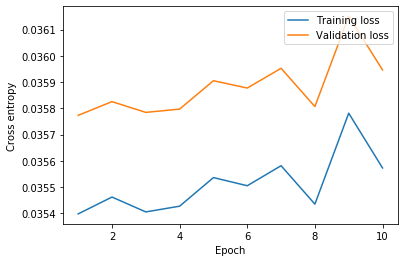

In [622]:
plt.plot(range(1, NUM_EPOCHS+1), train_loss_lst, label='Training loss')
plt.plot(range(1, NUM_EPOCHS+1), valid_loss_lst, label='Validation loss')
plt.legend(loc='upper right')
plt.ylabel('Cross entropy')
plt.xlabel('Epoch')
plt.show()

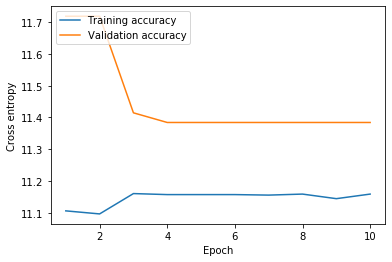

In [623]:
plt.plot(range(1, NUM_EPOCHS+1), train_acc_lst, label='Training accuracy')
plt.plot(range(1, NUM_EPOCHS+1), valid_acc_lst, label='Validation accuracy')
plt.legend(loc='upper left')
plt.ylabel('Cross entropy')
plt.xlabel('Epoch')
plt.show()

In [624]:
model.eval()
with torch.set_grad_enabled(False): # save memory during inference
    test_acc, test_loss = compute_accuracy_and_loss(model, test_loader, DEVICE)
    print(f'Test accuracy: {test_acc:.2f}%')

Test accuracy: 10.53%


In [586]:
num = 0

model.eval()
with torch.set_grad_enabled(False): # save memory during inference
    for i, (x, y) in enumerate(test_loader):
        if i == num:
            logits, probas = model(x)
            pred = np.argmax(probas, axis=1)
#             for i in range(len(pred)):
#                 print("Pred:", pred[i].item(), ", Target:", y[i].item(), ", Probs: ", probas[i][0].item() + probas[i][1].item() + probas[i][2].item(), "", probas[i][3].item() + probas[i][4].item() + probas[i][5].item(), " ", probas[i][6].item() + probas[i][7].item() + probas[i][8].item())
# #                 print(pred[i].item())
            print(pred)
            print(y)
            print(y[4].item() == np.argmax(probas, axis=1)[4].item())

tensor([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 8, 4, 4, 4, 3, 4, 4, 4, 8, 8, 8,
        8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 7, 7, 7, 5, 7, 7, 8, 8, 8, 8, 8, 8, 8,
        8, 8, 7, 5, 5, 5, 7, 5, 5, 5, 5, 5, 5, 5, 5, 8, 8, 8, 8, 8, 7, 5, 5, 5,
        5, 8, 8, 8, 8, 8, 8, 8, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 7, 7,
        7, 7, 5, 5, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 7,
        7, 8, 8, 8, 8, 7, 7, 8])
tensor([2, 5, 5, 6, 0, 5, 0, 0, 1, 1, 1, 2, 0, 2, 1, 1, 5, 2, 1, 3, 1, 2, 0, 0,
        3, 0, 3, 0, 8, 0, 3, 2, 2, 2, 3, 6, 5, 6, 7, 7, 0, 7, 0, 5, 2, 5, 8, 4,
        2, 6, 8, 7, 2, 4, 1, 7, 7, 6, 0, 8, 4, 7, 8, 4, 6, 6, 4, 4, 4, 6, 1, 0,
        5, 8, 1, 1, 8, 6, 0, 8, 2, 1, 2, 3, 1, 7, 4, 1, 5, 1, 2, 7, 2, 4, 2, 1,
        1, 2, 6, 6, 2, 5, 1, 5, 7, 7, 6, 2, 1, 6, 3, 7, 4, 4, 4, 7, 2, 4, 0, 3,
        0, 4, 8, 5, 3, 7, 1, 6])
False


In [587]:
compute_grouped_accuracy_and_loss(model, test_loader, DEVICE)

(41.514849745181884, 0.0)

In [588]:
compute_corr_accuracy_and_loss(model, valid_loader, DEVICE, 8)

(67.83625730994152, 12.54054054054054)

In [589]:
print(compute_corrlist_accuracy_and_loss(model, test_loader, DEVICE, [0, 1, 2]))
print(compute_corrlist_accuracy_and_loss(model, test_loader, DEVICE, [3, 4]))
print(compute_corrlist_accuracy_and_loss(model, test_loader, DEVICE, [5, 6, 7, 8]))

(0.6912096168294515, 44.230769230769226)
(3.638709677419355, 27.647058823529413)
(96.300259899098, 38.27550586376618)


In [590]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [591]:
def convertLabels(label):
    # 0 - 2 : 0
    # 3 - 4: 1
    # 5 - 8: 2
    bounds = [0, 2, 4, 8]
    if label >= bounds[0] and label <= bounds[1]:
        return 0
    elif label <= bounds[2]:
        return 1
    elif label <= bounds[3]:
        return 2
    return -1

In [592]:
# model

In [593]:
loader = test_loader
target_labels = []
pred_labels = []

target_labels_3 = []
pred_labels_3 = []
model.eval()
with torch.set_grad_enabled(False): # save memory during inference
    for i, (features, targets) in enumerate(loader):
        logits, probas = model(features)
        pred = np.argmax(probas, axis=1)
#         print("Targets:",targets.shape)
#         print("Predict:",pred.shape)

        for j in range(len(pred)):
            target_labels.append(targets[j].item())
            pred_labels.append(pred[j].item())
            target_labels_3.append(convertLabels(targets[j].item()))
            pred_labels_3.append(convertLabels(pred[j].item()))

In [594]:
# 9 labels
print(f1_score(target_labels, pred_labels, average='micro'))
f1_score(target_labels, pred_labels, average=None)

0.12289848280709977


array([0.01498929, 0.00099354, 0.00205761, 0.00417973, 0.05746661,
       0.19192449, 0.06305053, 0.13907285, 0.20151086])

In [595]:
# 3 labels
print(f1_score(target_labels_3, pred_labels_3, average='micro'))
f1_score(target_labels_3, pred_labels_3, average=None)

0.37994259270107206


array([0.01361148, 0.06431015, 0.54778676])

In [596]:
confusion_matrix(target_labels, pred_labels)

array([[  21,    0,    0,    4,   27,  356,   40,  385, 1882],
       [  14,    1,    3,    3,   58,  434,   64,  347, 1087],
       [   5,    0,    2,    7,   65,  495,   67,  328,  960],
       [  12,    0,    2,    4,   60,  509,   62,  315,  905],
       [   6,    0,    1,    6,   71,  514,   76,  352,  980],
       [   9,    1,    3,   13,   78,  549,   71,  334,  740],
       [   7,    0,    2,    5,   52,  484,   68,  345,  680],
       [   5,    0,    0,    3,   44,  396,   48,  315,  713],
       [   8,    0,    2,    0,   10,  186,   18,  285, 1067]])

In [597]:
confusion_matrix(target_labels_3, pred_labels_3)

array([[  46,  164, 6445],
       [  21,  141, 3713],
       [  37,  205, 6299]])

In [598]:
l = pred_labels
counts = {}

for i in l:
    if i in counts:
        counts[i] += 1
    else:
        counts[i] = 0

print(counts)

{5: 3922, 8: 9013, 4: 464, 3: 44, 7: 3005, 6: 513, 0: 86, 2: 14, 1: 1}


In [543]:
len(target_labels)/9

1896.7777777777778